In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('/content/zameen-updated.csv')

In [3]:
# Data Cleaning
# Handle missing values
df['city'].fillna('Unknown', inplace=True)
df['province_name'].fillna('Unknown', inplace=True)
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['baths'].fillna(df['baths'].mean(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['Area Size'].fillna(df['Area Size'].mean(), inplace=True)
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)


In [4]:
# Convert area units
df['Area_in_Marlas'] = df.apply(lambda x: x['Area Size']*20 if x['Area Type'] == 'Kanal' else x['Area Size'], axis=1)

In [5]:
# Convert 'date_added' to datetime and extract year, month, and day
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [6]:
# Drop unnecessary columns, including 'date_added'
df.drop(columns=['property_id', 'location_id', 'page_url', 'area', 'Area Size', 'date_added'], inplace=True)

In [7]:

# Differentiating between properties for sale and for rent
df_sale = df[df['purpose'] == 'For Sale']
df_rent = df[df['purpose'] == 'For Rent']

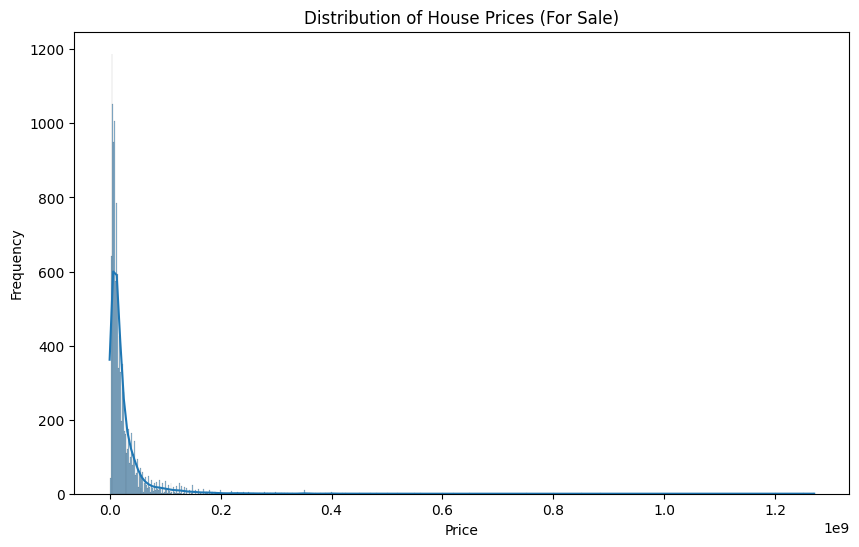

In [19]:

# Data Exploration for Properties for Sale
# Distribution of house prices (for sale)
plt.figure(figsize=(10, 6))
sns.histplot(df_sale['price'], kde=True)
plt.title('Distribution of House Prices (For Sale)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

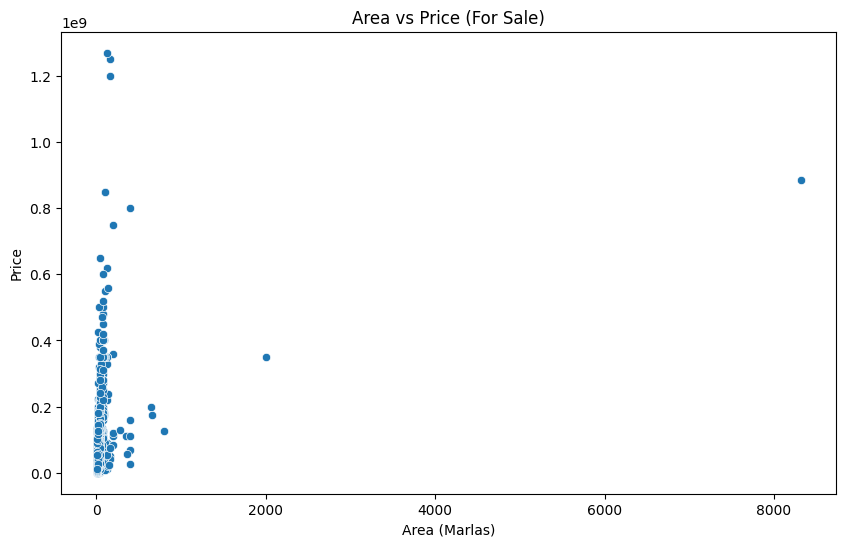

In [20]:
# Scatter plot of Area vs Price (for sale)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_Marlas', y='price', data=df_sale)
plt.title('Area vs Price (For Sale)')
plt.xlabel('Area (Marlas)')
plt.ylabel('Price')
plt.show()

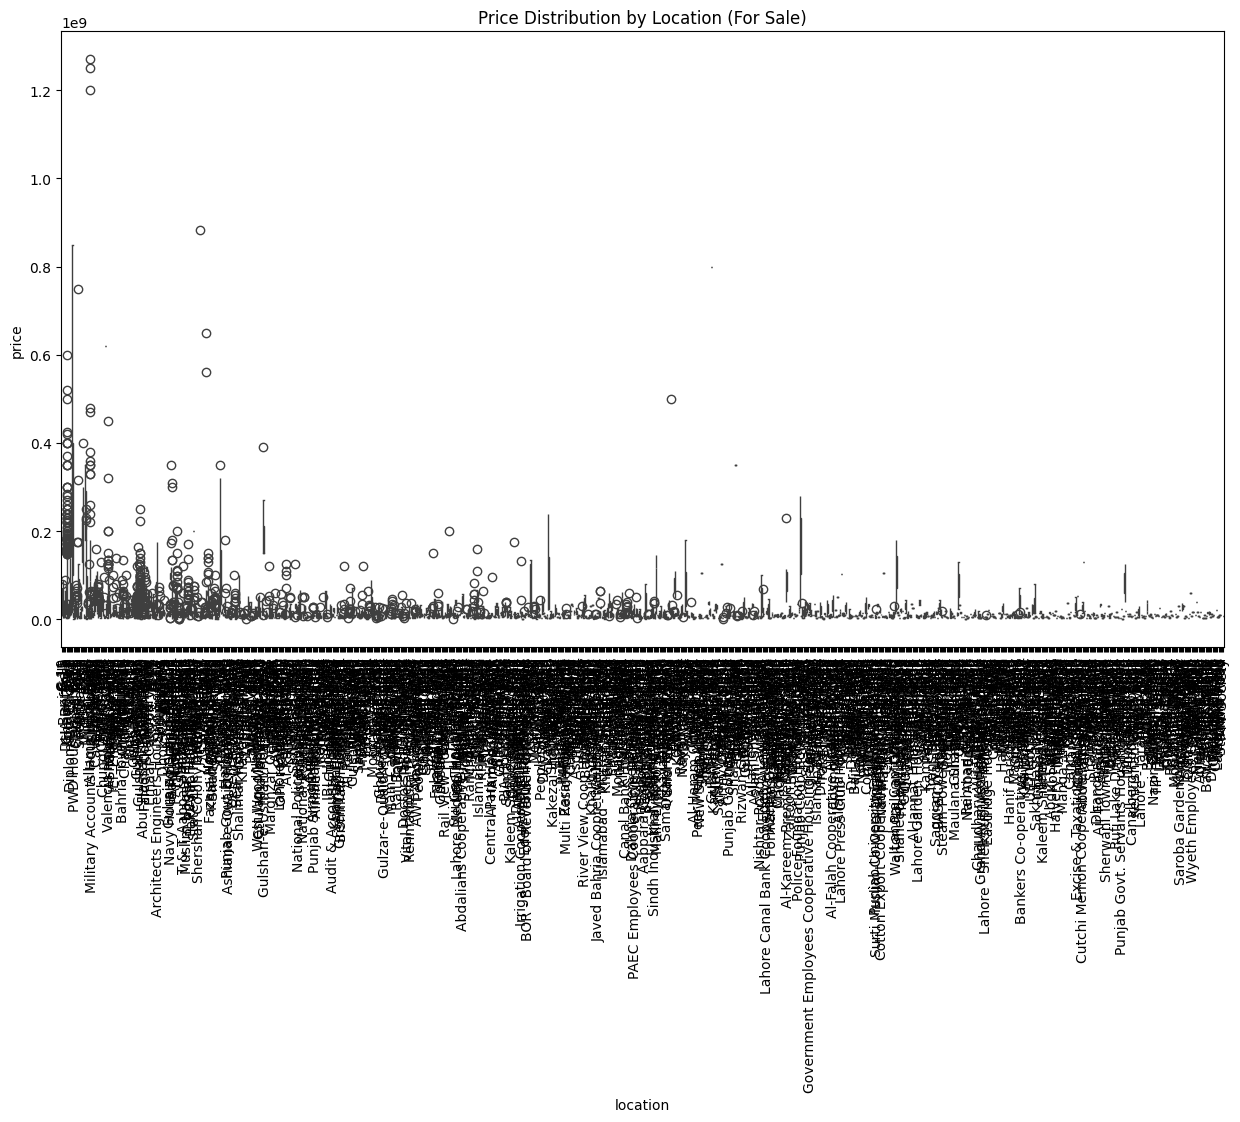

In [21]:

# Box plot of Price by Location (for sale)
plt.figure(figsize=(15, 8))
sns.boxplot(x='location', y='price', data=df_sale)
plt.xticks(rotation=90)
plt.title('Price Distribution by Location (For Sale)')
plt.show()

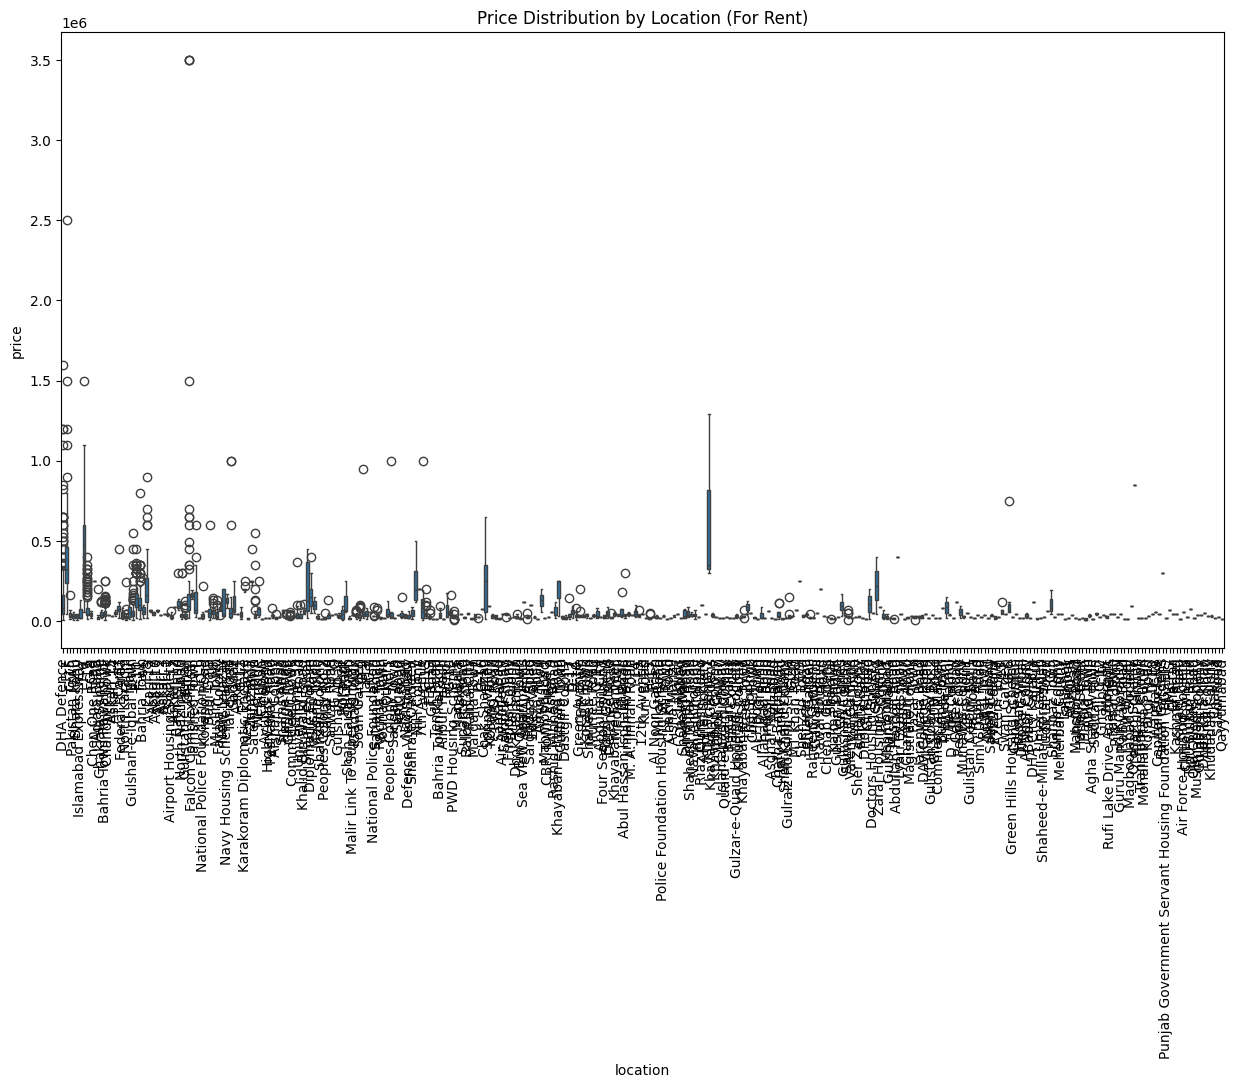

In [24]:
# Box plot of Price by Location (for rent)
plt.figure(figsize=(15, 8))
sns.boxplot(x='location', y='price', data=df_rent)
plt.xticks(rotation=90)
plt.title('Price Distribution by Location (For Rent)')
plt.show()

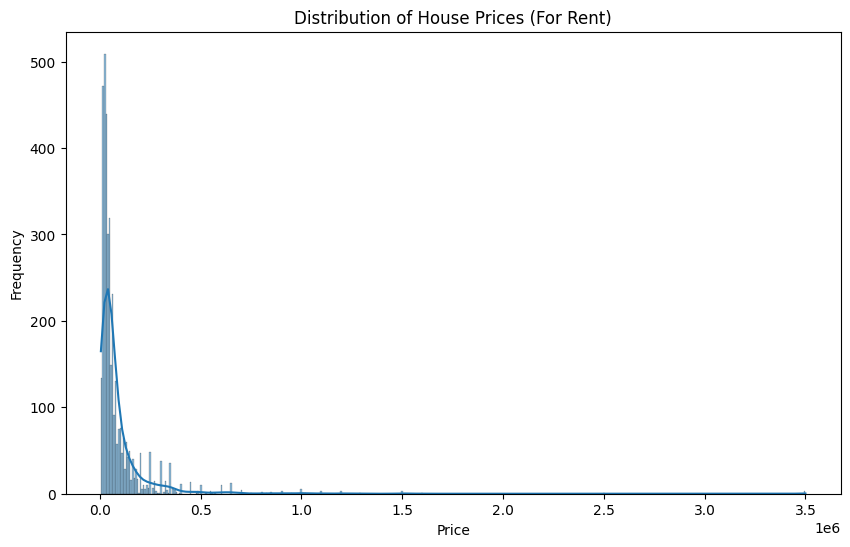

In [22]:

# Data Exploration for Properties for Rent
# Distribution of house prices (for rent)
plt.figure(figsize=(10, 6))
sns.histplot(df_rent['price'], kde=True)
plt.title('Distribution of House Prices (For Rent)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

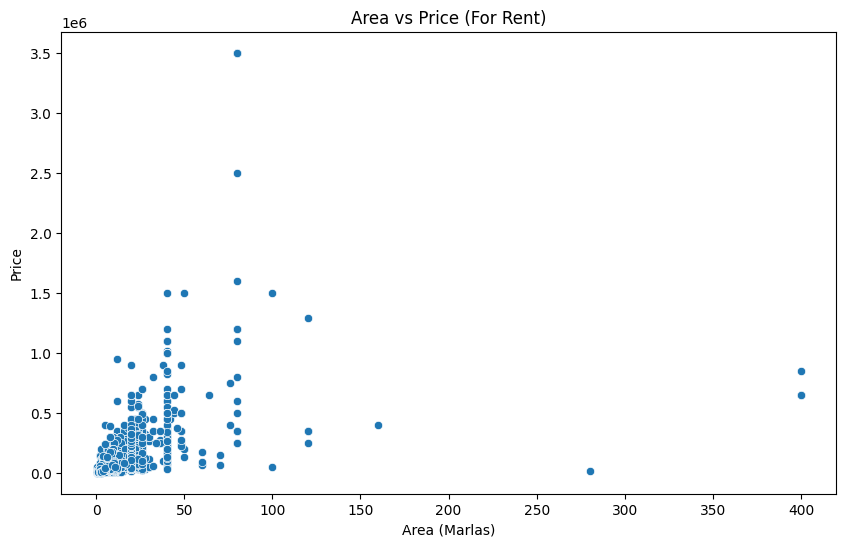

In [23]:
# Scatter plot of Area vs Price (for rent)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area_in_Marlas', y='price', data=df_rent)
plt.title('Area vs Price (For Rent)')
plt.xlabel('Area (Marlas)')
plt.ylabel('Price')
plt.show()

In [8]:
# Feature Engineering
# Encoding categorical variables
categorical_cols = ['location', 'property_type', 'purpose', 'city', 'province_name']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

In [9]:
# Outlier Analysis
# Using Z-score to identify outliers
df_encoded['z_score'] = np.abs(stats.zscore(df_encoded['price']))
df_outliers = df_encoded[df_encoded['z_score'] > 3]
df_no_outliers = df_encoded[df_encoded['z_score'] <= 3]
df_no_outliers.drop(columns=['z_score'], inplace=True)

<ipython-input-9-3eb97ff4381d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['z_score'], inplace=True)


In [10]:
# Predictive Modeling
# Splitting the dataset into training and testing sets
X = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Ensure all features are numeric
X = df_no_outliers.drop(columns=['price'])
y = df_no_outliers['price']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")

# If there are any non-numeric columns, drop or convert them
X = X.drop(columns=non_numeric_cols)

# Handle missing values by filling with the mean of the column
X = X.fillna(X.mean())

# Re-split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Output the first few predictions
print(y_pred_lr[:5])

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")


Non-numeric columns found: Index(['agency', 'agent', 'Area Type', 'Area Category'], dtype='object')
[13826496. 41862848. 29657664. 14825920. 28938816.]
Linear Regression - MSE: 3.7132388154881584e+34, R-squared: -7.329979496872694e+19


In [14]:
# Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# Model Evaluation
# Linear Regression Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")

Linear Regression - MSE: 3.7132388154881584e+34, R-squared: -7.329979496872694e+19


In [16]:
# Random Forest Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")

Random Forest - MSE: 63699895468358.43, R-squared: 0.8742556159360254


In [17]:
# Future Price Prediction
def predict_future_price(features):
    # Prepare input for model
    features_df = pd.DataFrame([features])
    features_encoded = pd.get_dummies(features_df, columns=categorical_cols)
    features_encoded = features_encoded.reindex(columns=X.columns, fill_value=0)

    # Predict using Random Forest model
    return rf.predict(features_encoded)

In [26]:
# Example prediction
example_features = {
    'Area_in_Marlas': 10,
    'baths': 3,
    'bedrooms': 4,
    'location': 'G-10',
    'property_type': 'House',
    'purpose': 'For Sale',
    'city': 'Islamabad',
    'province_name': 'Islamabad Capital',
    'year_added': 2019,
    'month_added': 4,
    'day_added': 2
}

predicted_price = predict_future_price(example_features)
print(f"Predicted price for the given features: {predicted_price[0]}")

Predicted price for the given features: 52841666.66666667
